In [1]:
import numpy as np
from os import path, listdir

from tensorflow.keras.models import load_model

from utils.gradcam import GradcamModel
from utils.methods import imshow


In [2]:
## Load models

model_mnv2 = load_model('models/model_mblf_mobilenetv2_20241209_200906_fold3.keras')
model_mnv2_msr = load_model('models/model_mblf_mobilenetv2_msr_20241209_182206_fold3.keras')
model_mnv2se = load_model('models/model_mblf_mobilenetv2se_20241209_171040_fold3.keras')
model_mnv2se_msr = load_model('models/model_mblf_mobilenetv2se_msr_20241209_155829_fold3.keras')


c:\Users\anant\.venv\ml\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 322 variables whereas the saved optimizer has 326 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\anant\.venv\ml\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 146 variables whereas the saved optimizer has 150 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:
## Setup gradcam

grad_mnv2 = GradcamModel(
    model=model_mnv2, 
    layer_name='out_relu'
)

grad_mnv2_msr = GradcamModel(
    model=model_mnv2_msr, 
    layer_name='block_7_expand_BN'
)

grad_mnv2se = GradcamModel(
    model=model_mnv2se, 
    layer_name='block_se_multiply'
)

grad_mnv2se_msr = GradcamModel(
    model=model_mnv2se_msr, 
    layer_name='block_se_multiply'
)


In [4]:
## Save gradcam heatmaps

def display_heatmap(img_path, grad_model=None, cls_idx=0, save_to=None):
    pred_idx, src, overlayed, heatmap = grad_model.generate_heatmaps(img_path=img_path, alpha=0.7)
    # Return if classified correctly
    if pred_idx == cls_idx:
        return src, heatmap
    else:
        print('[WARN]: This model produces wrong prediction for the given source image:', img_path)
        return src, np.zeros((224, 224, 3))


# 1. Grad-CAM for No Preprocessing

In [5]:
_spot_paths = [
    'data/no_preprocess/test/Leaf Spot/s (52).JPG', 
    'data/no_preprocess/test/Leaf Spot/IMG_20221228_160435.jpg', 
    'data/no_preprocess/test/Leaf Spot/IMG_0785.JPG',
] 
_rust_paths = [
    'data/no_preprocess/test/Leaf Rust/IMG_1442.JPG', 
    'data/no_preprocess/test/Leaf Rust/IMG_1443.JPG', 
    'data/no_preprocess/test/Leaf Rust/IMG_1504.JPG',
]
_df_paths = ['data/no_preprocess/test/Disease Free/h (16).JPG']

In [6]:
path.exists('data/no_preprocess/test/Disease Free/h (16).JPG')

True

Processing: data/no_preprocess/test/Disease Free/h (16).JPG


c:\Users\anant\.venv\ml\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_3']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


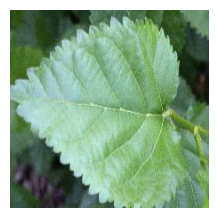

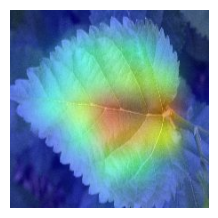

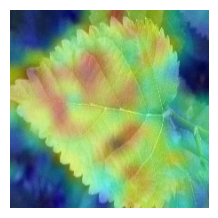

In [7]:
## Disease Free

idx = 0
for img_path in _df_paths:
    # File name
    print(f'Processing: {img_path}')
    src, map1 = display_heatmap(img_path, grad_model=grad_mnv2, cls_idx=idx)
    _, map2 = display_heatmap(img_path, grad_model=grad_mnv2se, cls_idx=idx)
    imshow([src])
    imshow([map1])
    imshow([map2])


Processing: data/no_preprocess/test/Leaf Rust/IMG_1442.JPG


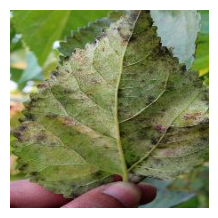

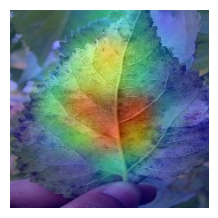

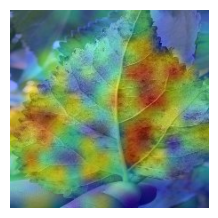

Processing: data/no_preprocess/test/Leaf Rust/IMG_1443.JPG


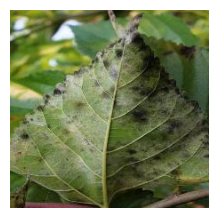

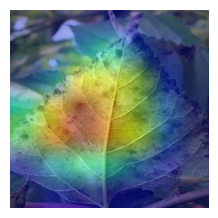

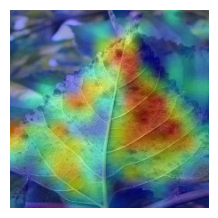

Processing: data/no_preprocess/test/Leaf Rust/IMG_1504.JPG


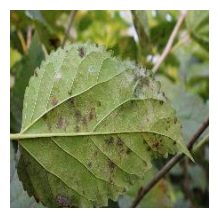

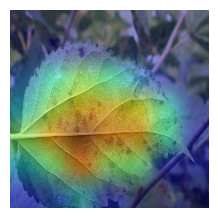

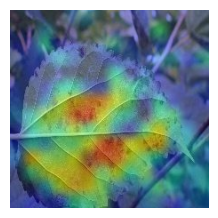

In [8]:
## Leaf Rust

idx = 1
for img_path in _rust_paths:
    # File name
    print(f'Processing: {img_path}')
    src, map1 = display_heatmap(img_path, grad_model=grad_mnv2, cls_idx=idx)
    _, map2 = display_heatmap(img_path, grad_model=grad_mnv2se, cls_idx=idx)
    imshow([src])
    imshow([map1])
    imshow([map2])


Processing: data/no_preprocess/test/Leaf Spot/s (52).JPG


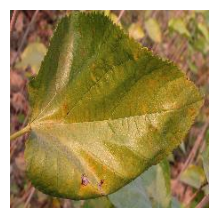

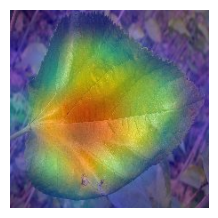

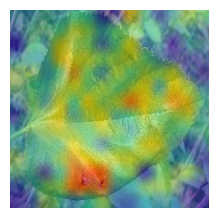

Processing: data/no_preprocess/test/Leaf Spot/IMG_20221228_160435.jpg


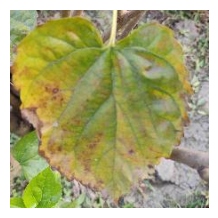

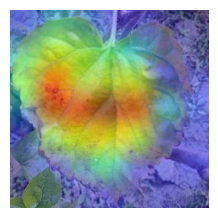

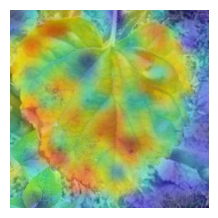

Processing: data/no_preprocess/test/Leaf Spot/IMG_0785.JPG


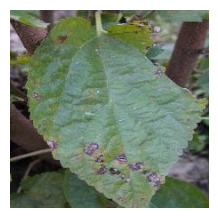

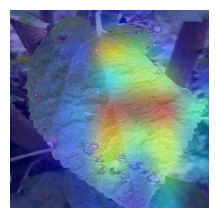

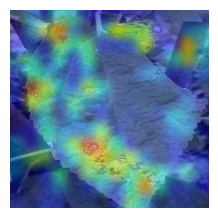

In [9]:
## Leaf Spot

idx = 2
for img_path in _spot_paths:
    # File name
    print(f'Processing: {img_path}')
    src, map1 = display_heatmap(img_path, grad_model=grad_mnv2, cls_idx=idx)
    _, map2 = display_heatmap(img_path, grad_model=grad_mnv2se, cls_idx=idx)
    imshow([src])
    imshow([map1])
    imshow([map2])
